# Exploring Commuting Pattern in New York Metro Area 

Our group is working on the relationship between intra-regional migration and transportation network in New York Metro Area. Therefore, for this project, I’m using the census data to explore how people commute to work in each county in the study area. The data is from Census Reporter at https://censusreporter.org/data/map/?table=B08006&geo_ids=31000US35620,050|31000US35620,05000US09001,05000US09009,05000US34021,05000US09005,05000US36111,05000US42089,05000US36027,05000US36071&primary_geo_id=31000US35620#column|B08006002,sumlev|050 

## Setting up the workplace

I will first import all libraries/modules I will be using in this project:

In [1]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

Done. Four libraries are now imported into this python notebook and ready to be used.

Next, I need to import my own dataset to start my coding. My dataset is a geojson file, which includes the geo-data. Iwill use Geopandas to read this file via the link:

In [2]:
transit = gpd.read_file ('data/transportation_means.geojson')

Yes! Now, it's in my notebook and seems working.  

## Data Preliminary Inspection

Before I start playing around the dataset, I have to take a look and inspect it to make sure I understand what it includes and what the potential problems I may encounter.

First, I want to check the size of the dataset:

In [3]:
transit.shape

(41, 105)

Not bad. There are 41 rows and 105 columns.  

Then, let me take a further look by checking on what it actually likes:

In [4]:
transit.head()

,geoid,name,B08006001,"B08006001, Error",B08006002,"B08006002, Error",B08006003,"B08006003, Error",B08006004,"B08006004, Error",...,"B08006047, Error",B08006048,"B08006048, Error",B08006049,"B08006049, Error",B08006050,"B08006050, Error",B08006051,"B08006051, Error",geometry
0,05000US09001,"Fairfield County, CT",468064.0,2386.0,375988.0,2628.0,337947.0,3039.0,38041.0,1687.0,...,74.0,181.0,76.0,5479.0,544.0,1801.0,327.0,13923.0,789.0,"MULTIPOLYGON (((-73.54362 41.37509, -73.54347 ..."
1,05000US09005,"Litchfield County, CT",95123.0,1086.0,84820.0,1219.0,79132.0,1375.0,5688.0,541.0,...,29.0,42.0,35.0,861.0,229.0,563.0,242.0,2907.0,308.0,"MULTIPOLYGON (((-73.50793 41.79152, -73.50787 ..."
2,05000US09007,"Middlesex County, CT",86720.0,941.0,76614.0,1192.0,70945.0,1120.0,5669.0,646.0,...,29.0,5.0,8.0,1485.0,315.0,422.0,161.0,2403.0,360.0,"MULTIPOLYGON (((-72.65367 41.43812, -72.65419 ..."
3,05000US09009,"New Haven County, CT",422610.0,3062.0,366374.0,3093.0,330972.0,3346.0,35402.0,1780.0,...,29.0,1035.0,360.0,7774.0,644.0,2082.0,402.0,9798.0,695.0,"MULTIPOLYGON (((-73.14755 41.36770, -73.14852 ..."
4,05000US09011,"New London County, CT",137099.0,1442.0,122030.0,1372.0,110273.0,1333.0,11757.0,920.0,...,29.0,55.0,48.0,1534.0,313.0,434.0,123.0,3141.0,389.0,"MULTIPOLYGON (((-72.32451 41.61857, -72.32467 ..."


Not bad. The rows are all counties in my study area and the columns are all relative data.

Now, i want to see how it looks like spatially. So, I will plot this dataset:

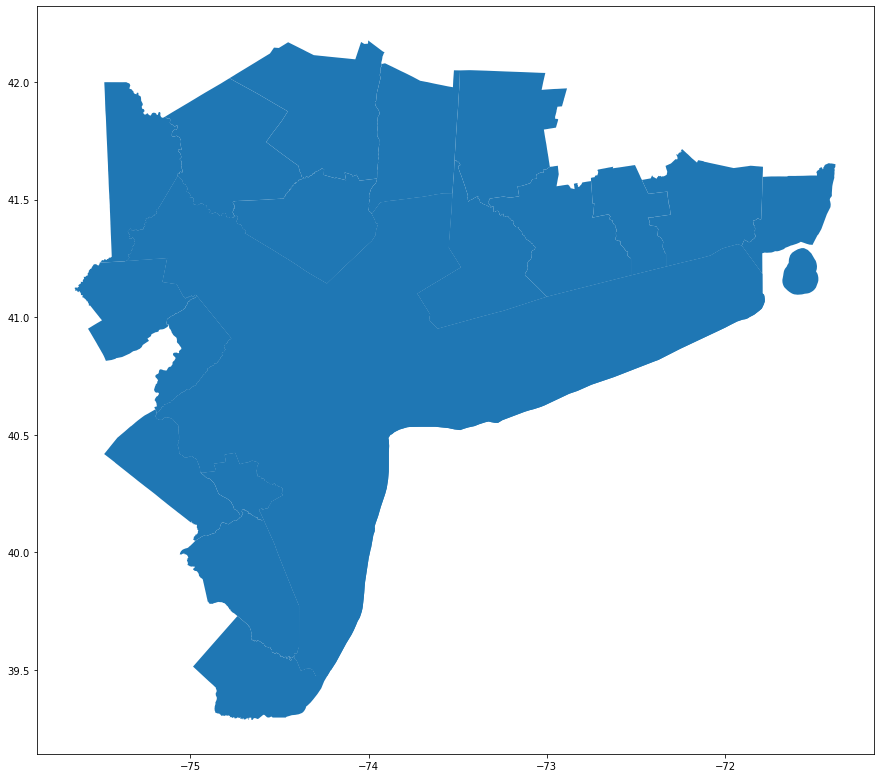

In [5]:
transit.plot(figsize=(15,15))

It looks cool. And I think it looks correct as well - it's same as what I imagine our study area would look like.

Before I still to "trim" this dataset, let me view the all rows to make sure all counties are there. Now, I'm gonna overwrite the default display setting:

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Now, I shall be able to see all columns and rows in my dataset:

In [7]:
transit

,geoid,name,B08006001,"B08006001, Error",B08006002,"B08006002, Error",B08006003,"B08006003, Error",B08006004,"B08006004, Error",B08006005,"B08006005, Error",B08006006,"B08006006, Error",B08006007,"B08006007, Error",B08006008,"B08006008, Error",B08006009,"B08006009, Error",B08006010,"B08006010, Error",B08006011,"B08006011, Error",B08006012,"B08006012, Error",B08006013,"B08006013, Error",B08006014,"B08006014, Error",B08006015,"B08006015, Error",B08006016,"B08006016, Error",B08006017,"B08006017, Error",B08006018,"B08006018, Error",B08006019,"B08006019, Error",B08006020,"B08006020, Error",B08006021,"B08006021, Error",B08006022,"B08006022, Error",B08006023,"B08006023, Error",B08006024,"B08006024, Error",B08006025,"B08006025, Error",B08006026,"B08006026, Error",B08006027,"B08006027, Error",B08006028,"B08006028, Error",B08006029,"B08006029, Error",B08006030,"B08006030, Error",B08006031,"B08006031, Error",B08006032,"B08006032, Error",B08006033,"B08006033, Error",B08006034,"B08006034, Error",B08006035,"B08006035, Error",B08006036,"B08006036, Error",B08006037,"B08006037, Error",B08006038,"B08006038, Error",B08006039,"B08006039, Error",B08006040,"B08006040, Error",B08006041,"B08006041, Error",B08006042,"B08006042, Error",B08006043,"B08006043, Error",B08006044,"B08006044, Error",B08006045,"B08006045, Error",B08006046,"B08006046, Error",B08006047,"B08006047, Error",B08006048,"B08006048, Error",B08006049,"B08006049, Error",B08006050,"B08006050, Error",B08006051,"B08006051, Error",geometry
0,05000US09001,"Fairfield County, CT",468064.0,2386.0,375988.0,2628.0,337947.0,3039.0,38041.0,1687.0,28763.0,1410.0,6004.0,684.0,3274.0,498.0,47049.0,1441.0,10730.0,747.0,1456.0,286.0,34517.0,1204.0,299.0,129.0,47.0,74.0,706.0,275.0,11596.0,909.0,4448.0,504.0,28277.0,1165.0,247332.0,1660.0,195186.0,2056.0,174439.0,2351.0,20747.0,1264.0,15258.0,1105.0,3652.0,540.0,1837.0,347.0,28503.0,1062.0,5364.0,613.0,855.0,172.0,22067.0,899.0,217.0,105.0,0.0,29.0,525.0,258.0,6117.0,707.0,2647.0,422.0,14354.0,757.0,220732.0,1814.0,180802.0,1965.0,163508.0,2009.0,17294.0,977.0,13505.0,832.0,2352.0,340.0,1437.0,304.0,18546.0,862.0,5366.0,526.0,601.0,166.0,12450.0,653.0,82.0,74.0,47.0,74.0,181.0,76.0,5479.0,544.0,1801.0,327.0,13923.0,789.0,"MULTIPOLYGON (((-73.54362 41.37509, -73.54347 ..."
1,05000US09005,"Litchfield County, CT",95123.0,1086.0,84820.0,1219.0,79132.0,1375.0,5688.0,541.0,4181.0,427.0,643.0,172.0,864.0,318.0,1345.0,207.0,353.0,120.0,398.0,111.0,534.0,146.0,60.0,72.0,0.0,29.0,157.0,87.0,2324.0,343.0,1114.0,330.0,5363.0,458.0,49385.0,753.0,44122.0,749.0,40815.0,825.0,3307.0,415.0,2399.0,345.0,461.0,146.0,447.0,226.0,678.0,149.0,126.0,50.0,227.0,90.0,325.0,102.0,0.0,29.0,0.0,29.0,115.0,76.0,1463.0,252.0,551.0,192.0,2456.0,382.0,45738.0,741.0,40698.0,841.0,38317.0,950.0,2381.0,273.0,1782.0,239.0,182.0,75.0,417.0,155.0,667.0,152.0,227.0,113.0,171.0,89.0,209.0,85.0,60.0,72.0,0.0,29.0,42.0,35.0,861.0,229.0,563.0,242.0,2907.0,308.0,"MULTIPOLYGON (((-73.50793 41.79152, -73.50787 ..."
2,05000US09007,"Middlesex County, CT",86720.0,941.0,76614.0,1192.0,70945.0,1120.0,5669.0,646.0,4523.0,527.0,801.0,328.0,345.0,154.0,1282.0,267.0,742.0,181.0,45.0,38.0,447.0,161.0,0.0,29.0,48.0,42.0,83.0,50.0,2608.0,428.0,890.0,220.0,5243.0,583.0,45001.0,630.0,39757.0,769.0,36840.0,772.0,2917.0,489.0,2206.0,384.0,502.0,297.0,209.0,105.0,735.0,208.0,334.0,153.0,9.0,14.0,344.0,142.0,0.0,29.0,48.0,42.0,78.0,48.0,1123.0,250.0,468.0,152.0,2840.0,390.0,41719.0,665.0,36857.0,827.0,34105.0,839.0,2752.0,382.0,2317.0,329.0,299.0,118.0,136.0,81.0,547.0,147.0,408.0,126.0,36.0,35.0,103.0,54.0,0.0,29.0,0.0,29.0,5.0,8.0,1485.0,315.0,422.0,161.0,2403.0,360.0,"MULTIPOLYGON (((-72.65367 41.43812, -72.65419 ..."
3,05000US09009,"New Haven County, CT",422610.0,3062.0,366374.0,3093.0,330972.0,3346.0,35402.0,1780.0,29172.0,1585.0,3542.0,573.0,2688.0,472.0,16090.0,1005.0,11697.0,900.0,390.0,123.0,3833.0,428.0,153.0,105.0,17.0,19.0,2322.0,407.0,14151.0,935.0,3988.0,551.0,19685.0,1254.0,211882.0,2087.0,185322.0,2217

Great. I am able to see the entire chart. But I can tell there are some problems in the chart. For example, the very last row 40 is a "Metro Area", not a county. I have to take this row out in the following section.

## Data Trimming

Now, I want to trim the dataset to make it easier to review and only keep the information that is important to me. 

First, I want to seee the list of columns:

In [8]:
list (transit)

['geoid',
 'name',
 'B08006001',
 'B08006001, Error',
 'B08006002',
 'B08006002, Error',
 'B08006003',
 'B08006003, Error',
 'B08006004',
 'B08006004, Error',
 'B08006005',
 'B08006005, Error',
 'B08006006',
 'B08006006, Error',
 'B08006007',
 'B08006007, Error',
 'B08006008',
 'B08006008, Error',
 'B08006009',
 'B08006009, Error',
 'B08006010',
 'B08006010, Error',
 'B08006011',
 'B08006011, Error',
 'B08006012',
 'B08006012, Error',
 'B08006013',
 'B08006013, Error',
 'B08006014',
 'B08006014, Error',
 'B08006015',
 'B08006015, Error',
 'B08006016',
 'B08006016, Error',
 'B08006017',
 'B08006017, Error',
 'B08006018',
 'B08006018, Error',
 'B08006019',
 'B08006019, Error',
 'B08006020',
 'B08006020, Error',
 'B08006021',
 'B08006021, Error',
 'B08006022',
 'B08006022, Error',
 'B08006023',
 'B08006023, Error',
 'B08006024',
 'B08006024, Error',
 'B08006025',
 'B08006025, Error',
 'B08006026',
 'B08006026, Error',
 'B08006027',
 'B08006027, Error',
 'B08006028',
 'B08006028, Error',
 

I can see there a tons of columns, but I want to only keep what I need.

Now, I want to keep the columns that I select:

In [9]:
columns_to_keep = ['geoid','name','B08006001','B08006002','B08006008','B08006011','B08006014','B08006015','B08006016','B08006017','geometry']

Now, I have successfully deleted the remaining columns that contain information that I don't need.

Next step, I have to redfeind the new dataset with the columns that I keep:

In [10]:
new_transit = transit [columns_to_keep]

Now I have this new dataset that only contains the useful information

Next, I want to check if this new dataset is something I want:

In [11]:
new_transit.head()

,geoid,name,B08006001,B08006002,B08006008,B08006011,B08006014,B08006015,B08006016,B08006017,geometry
0,05000US09001,"Fairfield County, CT",468064.0,375988.0,47049.0,34517.0,706.0,11596.0,4448.0,28277.0,"MULTIPOLYGON (((-73.54362 41.37509, -73.54347 ..."
1,05000US09005,"Litchfield County, CT",95123.0,84820.0,1345.0,534.0,157.0,2324.0,1114.0,5363.0,"MULTIPOLYGON (((-73.50793 41.79152, -73.50787 ..."
2,05000US09007,"Middlesex County, CT",86720.0,76614.0,1282.0,447.0,83.0,2608.0,890.0,5243.0,"MULTIPOLYGON (((-72.65367 41.43812, -72.65419 ..."
3,05000US09009,"New Haven County, CT",422610.0,366374.0,16090.0,3833.0,2322.0,14151.0,3988.0,19685.0,"MULTIPOLYGON (((-73.14755 41.36770, -73.14852 ..."
4,05000US09011,"New London County, CT",137099.0,122030.0,1982.0,383.0,392.0,4102.0,1287.0,7306.0,"MULTIPOLYGON (((-72.32451 41.61857, -72.32467 ..."


Perfect! this is exactly what I want.

Now, I need to rename the columns to make it clearer. First, I have to make all columns into a list:

In [12]:
list(new_transit)

['geoid',
 'name',
 'B08006001',
 'B08006002',
 'B08006008',
 'B08006011',
 'B08006014',
 'B08006015',
 'B08006016',
 'B08006017',
 'geometry']

Good. This is the list of all columns I need.

Next, I will rename thoes columns:

In [13]:
new_transit.columns = ['Geoid',
 'County',
 'Total Workers',
 'Car, truck, or van',
 'Public transportation (excluding taxicab)',
 'Long-distance train or commuter rail',
 'Bicycle',
 'Walked',
 'Taxicab, motorcycle, or other means',
 'Worked from home',
 'geometry']

Now, I have a new dataset with clear names. 

Next, I want to check if they are correct:

In [14]:
new_transit

,Geoid,County,Total Workers,"Car, truck, or van",Public transportation (excluding taxicab),Long-distance train or commuter rail,Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home,geometry
0,05000US09001,"Fairfield County, CT",468064.0,375988.0,47049.0,34517.0,706.0,11596.0,4448.0,28277.0,"MULTIPOLYGON (((-73.54362 41.37509, -73.54347 ..."
1,05000US09005,"Litchfield County, CT",95123.0,84820.0,1345.0,534.0,157.0,2324.0,1114.0,5363.0,"MULTIPOLYGON (((-73.50793 41.79152, -73.50787 ..."
2,05000US09007,"Middlesex County, CT",86720.0,76614.0,1282.0,447.0,83.0,2608.0,890.0,5243.0,"MULTIPOLYGON (((-72.65367 41.43812, -72.65419 ..."
3,05000US09009,"New Haven County, CT",422610.0,366374.0,16090.0,3833.0,2322.0,14151.0,3988.0,19685.0,"MULTIPOLYGON (((-73.14755 41.36770, -73.14852 ..."
4,05000US09011,"New London County, CT",137099.0,122030.0,1982.0,383.0,392.0,4102.0,1287.0,7306.0,"MULTIPOLYGON (((-72.32451 41.61857, -72.32467 ..."
5,05000US34001,"Atlantic County, NJ",124793.0,106611.0,6858.0,371.0,492.0,4568.0,2301.0,3963.0,"MULTIPOLYGON (((-74.85675 39.42076, -74.85670 ..."
6,05000US34003,"Bergen County, NJ",469569.0,354876.0,73916.0,14628.0,812.0,12060.0,5470.0,22435.0,"MULTIPOLYGON (((-74.24853 40.99209, -74.24860 ..."
7,05000US34005,"Burlington County, NJ",223799.0,201695.0,7684.0,3640.0,313.0,2552.0,2022.0,9533.0,"MULTIPOLYGON (((-74.89915 40.07321, -74.89880 ..."
8,05000US34013,"Essex County, NJ",369683.0,251423.0,80228.0,25254.0,291.0,14487.0,8186.0,15068.0,"MULTIPOLYGON (((-74.32916 40.83856, -74.32899 ..."
9,05000US34017,"Hudson County, NJ",350621.0,154891.0,149439.0,8716.0,1612.0,26581.0,6513.0,11585.0,"MULTIPOLYGON (((-74.09079 40.76198, -74.09027 ..."


Yes! This looks good! the columns have the right names and all data that I need are here!

Next, I have to take the last row 40 out becuase it is not a county. This is kind of a "summary" row that includes many counties in my chart already.

In [15]:
new_transit = new_transit.drop([40])

Now, it shall be dropped already. 

But I need to double check again:

In [16]:
new_transit

,Geoid,County,Total Workers,"Car, truck, or van",Public transportation (excluding taxicab),Long-distance train or commuter rail,Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home,geometry
0,05000US09001,"Fairfield County, CT",468064.0,375988.0,47049.0,34517.0,706.0,11596.0,4448.0,28277.0,"MULTIPOLYGON (((-73.54362 41.37509, -73.54347 ..."
1,05000US09005,"Litchfield County, CT",95123.0,84820.0,1345.0,534.0,157.0,2324.0,1114.0,5363.0,"MULTIPOLYGON (((-73.50793 41.79152, -73.50787 ..."
2,05000US09007,"Middlesex County, CT",86720.0,76614.0,1282.0,447.0,83.0,2608.0,890.0,5243.0,"MULTIPOLYGON (((-72.65367 41.43812, -72.65419 ..."
3,05000US09009,"New Haven County, CT",422610.0,366374.0,16090.0,3833.0,2322.0,14151.0,3988.0,19685.0,"MULTIPOLYGON (((-73.14755 41.36770, -73.14852 ..."
4,05000US09011,"New London County, CT",137099.0,122030.0,1982.0,383.0,392.0,4102.0,1287.0,7306.0,"MULTIPOLYGON (((-72.32451 41.61857, -72.32467 ..."
5,05000US34001,"Atlantic County, NJ",124793.0,106611.0,6858.0,371.0,492.0,4568.0,2301.0,3963.0,"MULTIPOLYGON (((-74.85675 39.42076, -74.85670 ..."
6,05000US34003,"Bergen County, NJ",469569.0,354876.0,73916.0,14628.0,812.0,12060.0,5470.0,22435.0,"MULTIPOLYGON (((-74.24853 40.99209, -74.24860 ..."
7,05000US34005,"Burlington County, NJ",223799.0,201695.0,7684.0,3640.0,313.0,2552.0,2022.0,9533.0,"MULTIPOLYGON (((-74.89915 40.07321, -74.89880 ..."
8,05000US34013,"Essex County, NJ",369683.0,251423.0,80228.0,25254.0,291.0,14487.0,8186.0,15068.0,"MULTIPOLYGON (((-74.32916 40.83856, -74.32899 ..."
9,05000US34017,"Hudson County, NJ",350621.0,154891.0,149439.0,8716.0,1612.0,26581.0,6513.0,11585.0,"MULTIPOLYGON (((-74.09079 40.76198, -74.09027 ..."


Yes! It's gone. Now the dataset is all set for the next step!

## Data Validation

In this section, I want to check if my current dataset has the write numbers and columns.

First, I will get a random data:

In [17]:
random = new_transit.sample()
random

,Geoid,County,Total Workers,"Car, truck, or van",Public transportation (excluding taxicab),Long-distance train or commuter rail,Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home,geometry
6,05000US34003,"Bergen County, NJ",469569.0,354876.0,73916.0,14628.0,812.0,12060.0,5470.0,22435.0,"MULTIPOLYGON (((-74.24853 40.99209, -74.24860 ..."


Now, I got a sample data. 

Next, I wil examine if the columns add up equal to the total workers:

In [18]:
print(random.iloc[0]['Car, truck, or van'] +
      random.iloc[0]['Public transportation (excluding taxicab)'] +
      random.iloc[0]['Bicycle'] +
      random.iloc[0]['Walked'] +
      random.iloc[0]['Taxicab, motorcycle, or other means'] +
      random.iloc[0]['Worked from home'] 
     )

469569.0


This is good. The sum of the columns is the same number of the total worker column. This means the dataset is okay. (Side note: The "Long-distance train" column is independant data that I will use in the following steps becuse this is the topic our group is exploring)

## Data Stats & Sorting

In this section, I want to focus on the column of "Long Distance Train or Commuter Rail" by checking on all stat:

First, I want to the mean,median,and also all general describtive info of this column:

In [19]:
new_transit['Long-distance train or commuter rail'].mean()

10908.0

In [20]:
new_transit['Long-distance train or commuter rail'].median()

3736.5

In [21]:
new_transit['Long-distance train or commuter rail'].describe()

count       40.000000
mean     10908.000000
std      18019.074732
min          0.000000
25%        510.750000
50%       3736.500000
75%      11780.250000
max      84420.000000
Name: Long-distance train or commuter rail, dtype: float64

Great. Now I have better understanding of this column:

On average, there are roughly 10,908 people in every county that travels at a regional scale via railways. 

Some states have none people that travel regionally, while the state with most regional travelers have 84,420 people travel regionally. 

Next, I want to plot this into a graph of 10 bins to better understand the pattern:



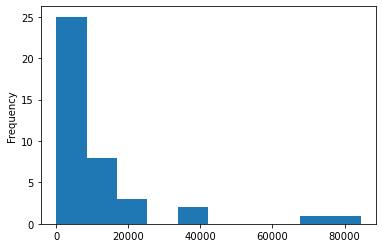

In [22]:
new_transit['Long-distance train or commuter rail'].plot.hist(bins=10)

Now, I want to know the top 3 states with most regional travellers:

In [23]:
new_transit_sorted = new_transit.sort_values(by='Long-distance train or commuter rail',ascending = False)

Now, I've sorted the dataset.

Next, I want to check the result and only show the column that I need:

In [24]:
new_transit_sorted[['County','Long-distance train or commuter rail']].head(3)

,County,Long-distance train or commuter rail
24,"Nassau County, NY",84420.0
34,"Westchester County, NY",69882.0
31,"Suffolk County, NY",35872.0


Great. This is the top 3 counties that have the most regional commuters.

Simiarlly, I want to see the bottom 3 counties that have least commuters:

In [25]:
new_transit_sorted[['County','Long-distance train or commuter rail']].tail(3)

,County,Long-distance train or commuter rail
37,"Pike County, PA",26.0
38,"Wayne County, PA",5.0
36,"Monroe County, PA",0.0


Those three counties have very few commuters.

Now, I want to see this "ranking" in a visual graph that helps me understand the overall pattern.

I'm gonna plot it:

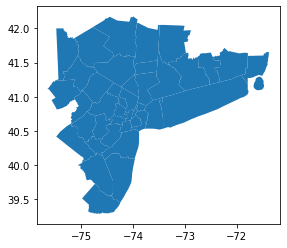

In [29]:
new_transit_sorted.plot()

Great..? Nope. It's not clear at all. I have to make it better:

I will add some gradient colors to show the differences based on the regional commutters:

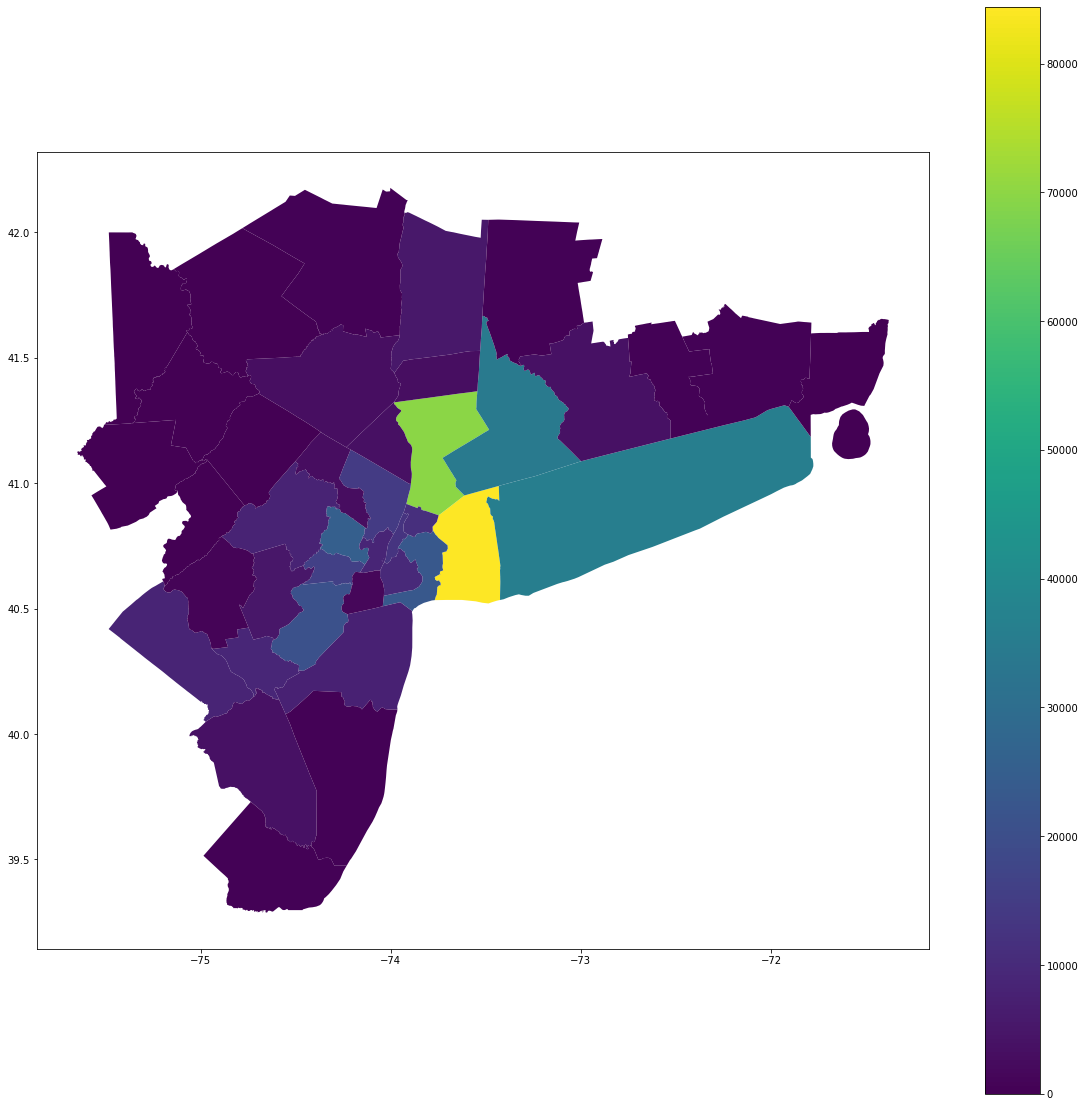

In [30]:
new_transit_sorted.plot(figsize=(20,20),column='Long-distance train or commuter rail',legend=True)

This is better. Now we can see better representation of regional commuters. 

However, these data are not precise yet. They are "numbers" not "percentage", which is more precise to present the proportion of commuters in the local counties.

## Normalize Data

First, I want to create a new column to calculate the percentage of commuters in each county:

In [33]:
new_transit['Percent of Regional Commuters'] = new_transit['Long-distance train or commuter rail']/new_transit['Total Workers']*100

new_transit

,Geoid,County,Total Workers,"Car, truck, or van",Public transportation (excluding taxicab),Long-distance train or commuter rail,Bicycle,Walked,"Taxicab, motorcycle, or other means",Worked from home,geometry,Percent of Regional Commuters
0,05000US09001,"Fairfield County, CT",468064.0,375988.0,47049.0,34517.0,706.0,11596.0,4448.0,28277.0,"MULTIPOLYGON (((-73.54362 41.37509, -73.54347 ...",7.374419
1,05000US09005,"Litchfield County, CT",95123.0,84820.0,1345.0,534.0,157.0,2324.0,1114.0,5363.0,"MULTIPOLYGON (((-73.50793 41.79152, -73.50787 ...",0.561378
2,05000US09007,"Middlesex County, CT",86720.0,76614.0,1282.0,447.0,83.0,2608.0,890.0,5243.0,"MULTIPOLYGON (((-72.65367 41.43812, -72.65419 ...",0.515452
3,05000US09009,"New Haven County, CT",422610.0,366374.0,16090.0,3833.0,2322.0,14151.0,3988.0,19685.0,"MULTIPOLYGON (((-73.14755 41.36770, -73.14852 ...",0.906983
4,05000US09011,"New London County, CT",137099.0,122030.0,1982.0,383.0,392.0,4102.0,1287.0,7306.0,"MULTIPOLYGON (((-72.32451 41.61857, -72.32467 ...",0.279360
5,05000US34001,"Atlantic County, NJ",124793.0,106611.0,6858.0,371.0,492.0,4568.0,2301.0,3963.0,"MULTIPOLYGON (((-74.85675 39.42076, -74.85670 ...",0.297292
6,05000US34003,"Bergen County, NJ",469569.0,354876.0,73916.0,14628.0,812.0,12060.0,5470.0,22435.0,"MULTIPOLYGON (((-74.24853 40.99209, -74.24860 ...",3.115197
7,05000US34005,"Burlington County, NJ",223799.0,201695.0,7684.0,3640.0,313.0,2552.0,2022.0,9533.0,"MULTIPOLYGON (((-74.89915 40.07321, -74.89880 ...",1.626459
8,05000US34013,"Essex County, NJ",369683.0,251423.0,80228.0,25254.0,291.0,14487.0,8186.0,15068.0,"MULTIPOLYGON (((-74.32916 40.83856, -74.32899 ...",6.831258
9,05000US34017,"Hudson County, NJ",350621.0,154891.0,149439.0,8716.0,1612.0,26581.0,6513.0,11585.0,"MULTIPOLYGON (((-74.09079 40.76198, -74.09027 ...",2.485875


Yea, it works! I can see a column with all percentages for counties. 

I will start map out several findings:

## Data Mapping

In this very last step, I will map " commuter number" to show where they are located.

First, I will plot what I have so far and add some features (e.g. color, scheme, etc.) to the maps as well:

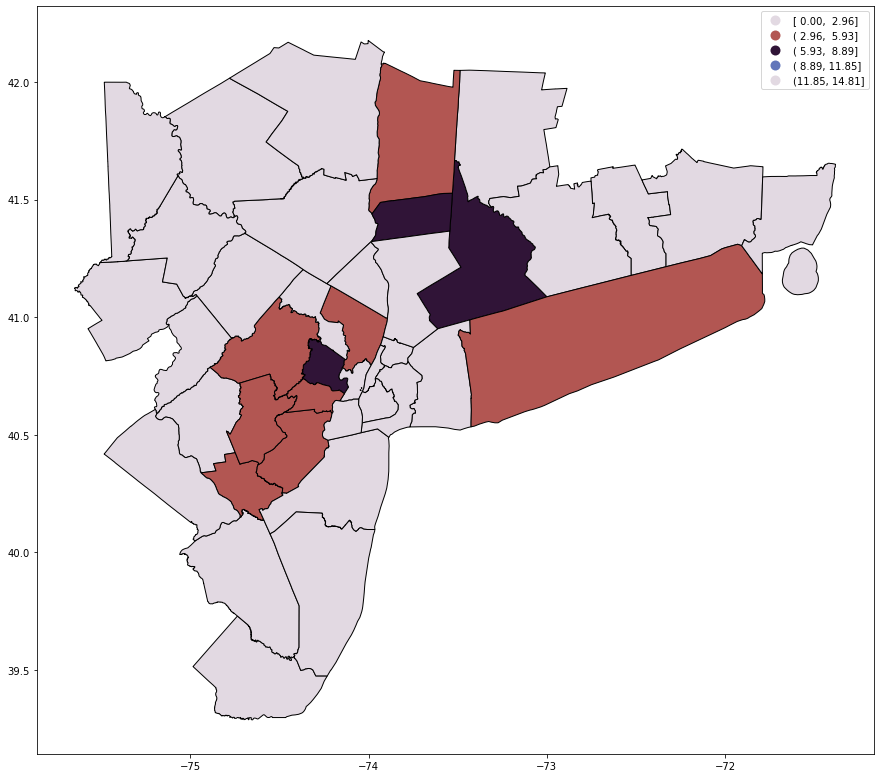

In [68]:
new_transit.plot(figsize=(15,15),
                 column='Percent of Regional Commuters',
                 legend=True, 
                 cmap ='twilight_r',
                 edgecolor='black',
                 scheme='equal_interval')

Yea, it works! I can see the counties are different from each other. 

I want to make it even clearer by adding the basemap in.

First, I need to reproject my dataset to Web Mercator

In [66]:
new_transit_web_mercator = new_transit.to_crs(epsg=3857)

Done. Now it shall be ready for next steps.

Then, I need to start plot it to the basemap and set up several details:

First, I need to create two layers for the map. I also add some feature to the map such as the title, color. Lastly, I add the basemap:

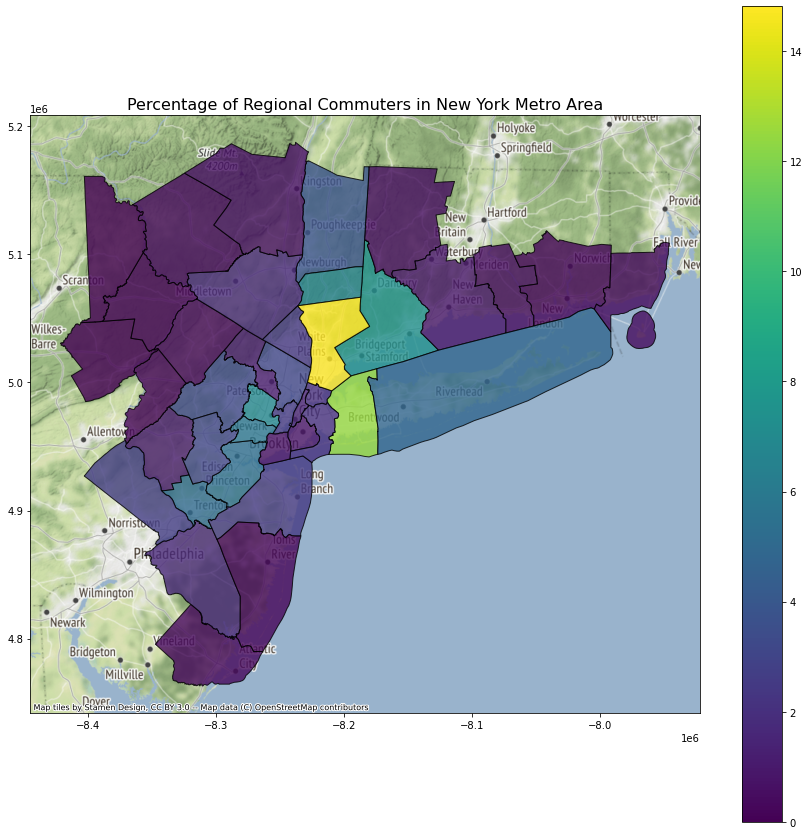

In [88]:
fig, ax = plt.subplots(figsize=(15, 15))

new_transit_web_mercator.plot(ax=ax, alpha=0.8,column = 'Percent of Regional Commuters',legend=True, edgecolor="black")

ax.set_title('Percentage of Regional Commuters in New York Metro Area',fontsize=16)

ctx.add_basemap(ax)

This is the final result from this project. From this map, we can see the proportion of commuters in each county.

Generally it works well. I hope to add more "map features" to make it looks prettier in the future when we are doing the final project. In addition, I also consider to zoom into the census tract scale for the final project, since it gives more precise representation of the topic.